# Sentiment Analysis of IMDB Movie Reviews

## 1. Business Understanding

### Introduction
In the entertainment industry, understanding audience feedback is crucial for improving content, driving marketing strategies, and enhancing user experiences. Online reviews, particularly those on platforms like IMDB, provide valuable insights into audience sentiment. However, manually analyzing these reviews is time-consuming and impractical due to the sheer volume of data available.

### Problem Statement
The core challenge lies in the need to efficiently and accurately understand moviegoers' sentiments based on thousands of reviews. The manual approach to sentiment analysis is labor-intensive, error-prone, and unscalable. To address this, we aim to develop an automated machine learning model that can categorize each review as either positive or negative. This will enable stakeholders—such as movie studios, streaming platforms, and marketers—to make informed decisions based on audience sentiment. The insights can help improve content quality, optimize marketing efforts, and create personalized recommendation systems.

### Objective
The objective of this project is to create a sentiment analysis model capable of categorizing IMDB movie reviews into positive or negative sentiments. By doing so, the model will provide a systematic way of understanding customer preferences, which can be leveraged for improving customer satisfaction scores, making data-driven decisions, and enhancing recommendation systems.

### Dataset Description
The dataset used in this project is the **IMDB movie reviews dataset**, which contains **50,000** labeled movie reviews. The reviews are labeled as either **positive** or **negative**, making this a binary classification problem. The dataset is balanced, with an equal number of positive and negative reviews, providing an unbiased foundation for training the model.

Key attributes of the dataset include:
- **Review Text**: Rich textual data representing user opinions and experiences with movies.
- **Sentiment Label**: Each review is labeled as either 'positive' or 'negative', indicating the overall sentiment.

The diversity in review length, complexity, and content makes this dataset ideal for developing and testing robust sentiment analysis models. The ultimate goal is to create a model capable of analyzing new, unseen reviews with high accuracy, providing actionable insights for industry stakeholders.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tonyg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tonyg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tonyg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tonyg\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Error: Required NLTK resources are missing. Please ensure all resources are downloaded correctly.
Dataset loaded successfully.
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Dataset dimensions: (50000, 2)
Columns:
Index(['review', 'sentiment'], dtype='object')
Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
Missing values in each column:
review       0
sentiment    0
dtype: int64
Number of e

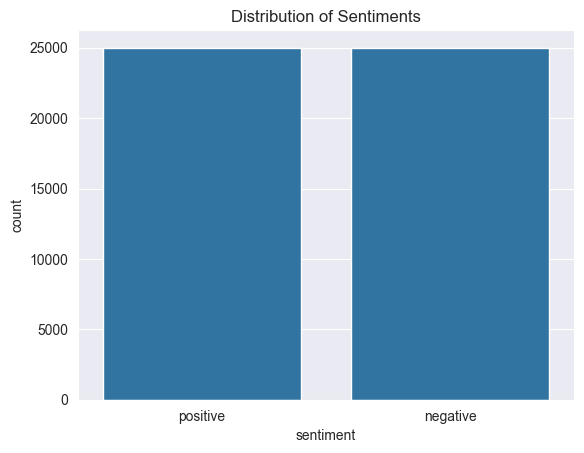

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


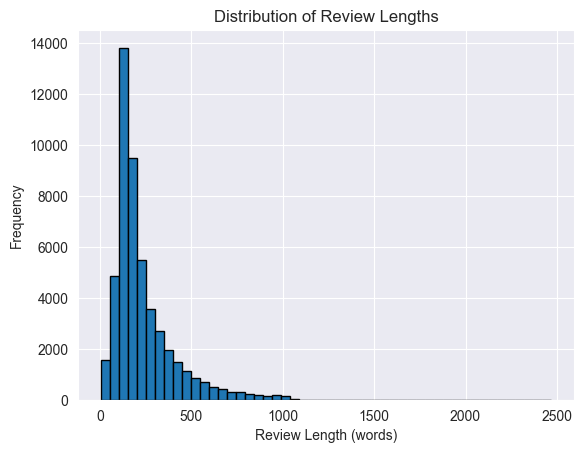

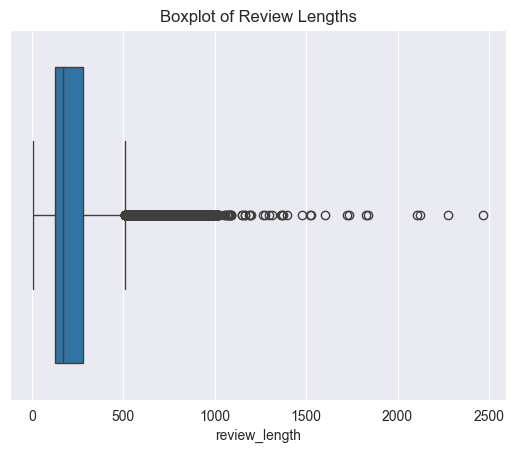

In [8]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary resources for NLTK (stopwords and punkt tokenizer)
resources = ['stopwords', 'punkt', 'wordnet', 'omw-1.4']
for resource in resources:
    try:
        nltk.download(resource)
    except Exception as e:
        print(f"Error downloading {resource}: {e}")

# Function to check if necessary NLTK resources are available
def check_nltk_resources():
    """Check if necessary NLTK resources are available."""
    try:
        nltk.data.find('tokenizers/punkt')
        nltk.data.find('corpora/stopwords')
        nltk.data.find('corpora/wordnet')
        return True
    except LookupError:
        print("Error: Required NLTK resources are missing. Please ensure all resources are downloaded correctly.")
        return False

nltk_resources_ready = check_nltk_resources()

def load_data(file_path):
    """Load dataset from the provided file path."""
    try:
        df = pd.read_csv(file_path)
        if df is not None:
            print("Dataset loaded successfully.")
            return df
        else:
            print("Dataset is empty.")
            return None
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

def initial_inspection(df):
    """Perform initial inspection of the dataset."""
    if df is not None and not df.empty:
        print(df.head())
        print(f"Dataset dimensions: {df.shape}")
        print("Columns:")
        print(df.columns)
        print("Data Types:")
        print(df.info())
    else:
        print("Data not loaded or dataset is empty.")

def check_missing_data(df):
    """Check for missing values in the dataset."""
    if df is not None and not df.empty:
        print("Missing values in each column:")
        print(df.isnull().sum())
    else:
        print("Data not loaded or dataset is empty.")

def check_empty_reviews(df):
    """Check for empty or very short reviews."""
    if df is not None and not df.empty:
        empty_reviews = df[df['review'].str.strip() == ""]
        print(f"Number of empty reviews: {len(empty_reviews)}")
    else:
        print("Data not loaded or dataset is empty.")

def basic_text_quality(df):
    """Assess reviews with only special characters."""
    if df is not None and not df.empty:
        malformed_reviews = df[df['review'].str.contains(r'^\W*$', regex=True)]
        print(f"Number of malformed reviews: {len(malformed_reviews)}")
    else:
        print("Data not loaded or dataset is empty.")

def sentiment_distribution(df):
    """Analyze the distribution of sentiments in the dataset."""
    if df is not None and not df.empty:
        sns.countplot(x=df['sentiment'])
        plt.title('Distribution of Sentiments')
        plt.show()
    else:
        print("Data not loaded or dataset is empty.")

def review_length_analysis(df):
    """Analyze the length and variability of reviews."""
    if df is not None and not df.empty:
        df['review_length'] = df['review'].apply(lambda x: len(x.split()))
        print(df['review_length'].describe())
        plt.hist(df['review_length'], bins=50, edgecolor='black')
        plt.xlabel('Review Length (words)')
        plt.ylabel('Frequency')
        plt.title('Distribution of Review Lengths')
        plt.show()
        return df
    else:
        print("Data not loaded or dataset is empty.")
        return df

def identify_outliers(df):
    """Identify outlier reviews based on review length."""
    if df is not None and not df.empty:
        sns.boxplot(x=df['review_length'])
        plt.title('Boxplot of Review Lengths')
        plt.show()
    else:
        print("Data not loaded or dataset is empty.")

if __name__ == "__main__":
    file_path = "data/IMDB-Dataset.csv"
    df = load_data(file_path)
    initial_inspection(df)
    check_missing_data(df)
    check_empty_reviews(df)
    basic_text_quality(df)
    sentiment_distribution(df)
    df = review_length_analysis(df)
    identify_outliers(df)


The analysis was successfully carried out, providing insights into the IMDB dataset. Here are the key findings:

Initial Inspection: The dataset has 50,000 reviews, with two columns: review (text) and sentiment (label). No missing values were found.

Data Quality: No empty or malformed reviews were detected.

Sentiment Distribution: The sentiment distribution plot shows how the reviews are categorized as positive or negative.

Review Length Analysis: The length of reviews varies significantly, with an average of about 231 words. Review lengths range from as short as 4 words to as long as 2470 words.

Outliers: A boxplot was used to identify unusually long or short reviews.

## 2. Data Preparation and Preprocessing

### Strategy Overview

The next phase involves preparing and preprocessing the IMDB dataset to ensure it is ready for model training. This step includes several crucial transformations aimed at cleaning and standardizing the data to make it suitable for sentiment analysis.

1. **Outlier Removal**: Reviews with extreme lengths are removed to minimize noise, ensuring the dataset is focused on typical review patterns that the model can learn effectively from.

2. **Cleaning HTML and Special Characters**: Many reviews contain HTML tags and special characters that do not contribute to sentiment. These elements are removed to retain only the meaningful text.

3. **Lowercasing Text**: All text is converted to lowercase to ensure consistency, preventing the model from considering words like "Good" and "good" as different features.

4. **Stopword Removal and Lemmatization**: Common stopwords that add little to no meaning are removed, and each word is lemmatized to its base form using spaCy. This process reduces vocabulary size and enhances the model's ability to learn from core words without unnecessary repetition.

This preprocessing strategy is designed to create a cleaned, standardized dataset that allows the machine learning model to focus on the most meaningful aspects of the text, ultimately improving sentiment classification accuracy.



In [10]:
import pandas as pd
import re
import spacy
from bs4 import BeautifulSoup

# Load spaCy language model
nlp = spacy.load('en_core_web_sm')

def remove_outliers(df):
    """Remove reviews with extreme lengths that might be noisy."""
    if df is not None and not df.empty:
        # Removing reviews with length greater than 2000 words
        df = df[df['review_length'] <= 2000]
        print(f"Dataset size after removing outliers: {df.shape}")
        return df
    else:
        print("Data not loaded or dataset is empty.")
        return df

def clean_html_and_special_chars(df):
    """Clean HTML tags and special characters from reviews."""
    if df is not None and not df.empty:
        df['review'] = df['review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())
        print("HTML tags removed from reviews.")
        return df
    else:
        print("Data not loaded or dataset is empty.")
        return df

def convert_to_lowercase(df):
    """Convert all reviews to lowercase."""
    if df is not None and not df.empty:
        df['review'] = df['review'].apply(lambda x: x.lower())
        print("Converted all reviews to lowercase.")
        return df
    else:
        print("Data not loaded or dataset is empty.")
        return df

def remove_stopwords_and_lemmatize(df):
    """Remove stopwords and lemmatize reviews using spaCy."""
    if df is not None and not df.empty:
        try:
            def process_review(review):
                doc = nlp(review)
                # Remove stopwords and punctuations, lemmatize the remaining words
                return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

            df['clean_review'] = df['review'].apply(process_review)
            print("Stopwords removed and lemmatization applied using spaCy.")
            return df
        except Exception as e:
            print(f"Error processing reviews with spaCy: {e}")
            return df
    else:
        print("Data not loaded or dataset is empty.")
        return df

if __name__ == "__main__":
    file_path = "data/IMDB-Dataset.csv"
    df = pd.read_csv(file_path)
    df['review_length'] = df['review'].apply(lambda x: len(x.split()))

    # Extended functionality for data preparation
    df = remove_outliers(df)
    df = clean_html_and_special_chars(df)
    df = convert_to_lowercase(df)
    df = remove_stopwords_and_lemmatize(df)

    # Final dataset preview
    if df is not None and not df.empty:
        print(df.head())
    else:
        print("Dataset is empty after processing.")


Dataset size after removing outliers: (49996, 3)


C:\Users\tonyg\AppData\Local\Temp\ipykernel_17068\78734538.py:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['review'] = df['review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


HTML tags removed from reviews.
Converted all reviews to lowercase.
Stopwords removed and lemmatization applied using spaCy.
                                              review sentiment  review_length  \
0  one of the other reviewers has mentioned that ...  positive            307   
1  a wonderful little production. the filming tec...  positive            162   
2  i thought this was a wonderful way to spend ti...  positive            166   
3  basically there's a family where a little boy ...  negative            138   
4  petter mattei's "love in the time of money" is...  positive            230   

                                        clean_review  
0  reviewer mention watch 1 oz episode hook right...  
1  wonderful little production film technique una...  
2  think wonderful way spend time hot summer week...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


In [11]:
# cleaned_df = df.copy()

## 3. Feature Engineering and Modeling

### Strategy Overview

The next stage of the process involves transforming the cleaned dataset into a format suitable for training machine learning models and building predictive models for sentiment analysis.

1. **Feature Engineering**: This involves creating meaningful numerical representations of the text data. We use two main techniques:
   - **Bag of Words (BoW)**: Represents text by counting the frequency of each word, capturing word-level information without context.
   - **TF-IDF Vectorization**: This approach refines the Bag of Words by considering the importance of words relative to the entire corpus, reducing the impact of commonly used words.
   - **Additional Features**: Extra features such as review length, sentiment word counts, and punctuation statistics are added to enrich the dataset, providing more context for the model.

2. **Model Training**: Once the feature engineering is complete, several models are trained on the transformed dataset to determine the most effective approach for sentiment classification:
   - **Baseline Models**: Models such as **Logistic Regression** and **Naive Bayes** are used to establish a performance benchmark.
   - **Advanced Model**: **CatBoost Classifier**, a gradient boosting algorithm, is employed to explore a more sophisticated, potentially more accurate, approach to sentiment analysis.

3. **Hyperparameter Tuning**: To optimize model performance, we conduct **hyperparameter tuning** using **GridSearchCV** for the CatBoost model. This helps in identifying the best model parameters to improve prediction accuracy.

4. **Model Evaluation**: Each trained model is evaluated using metrics such as **accuracy, precision, recall, F1-score**, and **confusion matrix**. These metrics provide a comprehensive understanding of model performance, helping in the selection of the most suitable model for deployment.

This combined strategy of feature engineering, training, and evaluation aims to develop a reliable model capable of effectively classifying the sentiment of IMDB movie reviews.

Bag of Words Vectorization completed.
TF-IDF Vectorization completed.
Feature creation completed.

Modeling with Bag of Words Features:

Logistic Regression Model Accuracy: 0.8692
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      5008
           1       0.86      0.88      0.87      4992

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Naive Bayes Model Accuracy: 0.8401
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5008
           1       0.84      0.84      0.84      4992

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

CatBoost Model Accuracy: 0.8714
              precision    recall  f1-score   support

           0       0.89      0.85      0.87 

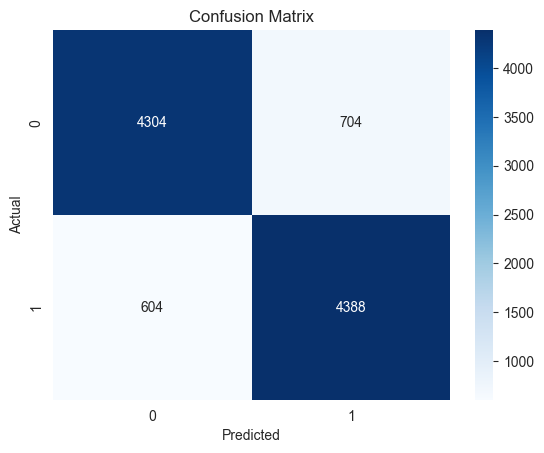


Evaluating CatBoost Model:

Model Accuracy: 0.8714
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5008
           1       0.85      0.90      0.87      4992

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



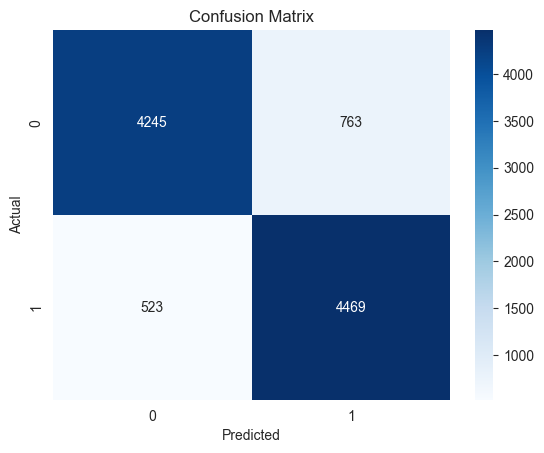


Hyperparameter Tuning for CatBoost:

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found by GridSearchCV for CatBoost: {'depth': 8, 'iterations': 500, 'learning_rate': 0.2}

Evaluating Best CatBoost Model:

Model Accuracy: 0.8749
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5008
           1       0.86      0.89      0.88      4992

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



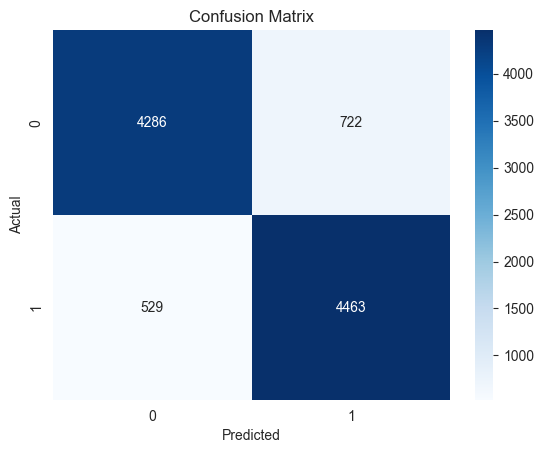

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import spacy


# Load spaCy language model
nlp = spacy.load('en_core_web_sm')

# Feature Engineering

def feature_engineering(cleaned_df):
    """Perform feature engineering on the cleaned DataFrame."""
    df = cleaned_df.copy()
    
    # 1. Text Vectorization
    # Bag of Words (BoW)
    vectorizer_bow = CountVectorizer(max_features=5000)
    X_bow = vectorizer_bow.fit_transform(df['clean_review'])
    print("Bag of Words Vectorization completed.")

    # TF-IDF Vectorizer
    vectorizer_tfidf = TfidfVectorizer(max_features=5000)
    X_tfidf = vectorizer_tfidf.fit_transform(df['clean_review'])
    print("TF-IDF Vectorization completed.")

    # 2. Feature Creation
    # Review Length
    df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))
    
    # Sentiment Words Count using spaCy's sentiment lexicon
    positive_words = ["good", "great", "excellent", "amazing", "wonderful", "love"]
    negative_words = ["bad", "terrible", "awful", "hate", "poor", "worst"]
    df['positive_word_count'] = df['clean_review'].apply(lambda x: sum([1 for word in nlp(x) if word.lemma_ in positive_words]))
    df['negative_word_count'] = df['clean_review'].apply(lambda x: sum([1 for word in nlp(x) if word.lemma_ in negative_words]))

    # Capitalization and Exclamation Marks
    df['capital_word_count'] = df['review'].apply(lambda x: sum([1 for word in x.split() if word.isupper()]))
    df['exclamation_count'] = df['review'].apply(lambda x: x.count('!'))

    print("Feature creation completed.")
    
    return X_bow, X_tfidf, df

# Modeling

def train_test_split_and_modeling(X, y):
    """Split data into train and test sets and train models."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 1. Baseline Models
    # Logistic Regression
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_lr))
    print(classification_report(y_test, y_pred_lr))

    # Naive Bayes
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)
    print("Naive Bayes Model Accuracy:", accuracy_score(y_test, y_pred_nb))
    print(classification_report(y_test, y_pred_nb))

    # 2. Advanced Models
    # CatBoost Classifier
    catboost_model = CatBoostClassifier(verbose=0, iterations=500, learning_rate=0.1, depth=6)
    catboost_model.fit(X_train, y_train)
    y_pred_catboost = catboost_model.predict(X_test)
    print("CatBoost Model Accuracy:", accuracy_score(y_test, y_pred_catboost))
    print(classification_report(y_test, y_pred_catboost))

    return lr, nb, catboost_model, X_train, X_test, y_train, y_test

# Hyperparameter Tuning

def hyperparameter_tuning_catboost(X_train, y_train):
    """Tune hyperparameters using GridSearchCV for CatBoostClassifier."""
    param_grid = {
        'iterations': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [4, 6, 8]
    }
    catboost_model = CatBoostClassifier(verbose=0)
    grid = GridSearchCV(catboost_model, param_grid, cv=3, n_jobs=-1, verbose=2)
    grid.fit(X_train, y_train)
    print("Best parameters found by GridSearchCV for CatBoost:", grid.best_params_)
    return grid.best_estimator_

# Model Evaluation

def evaluate_model(model, X_test, y_test):
    """Evaluate the model using metrics like accuracy, confusion matrix, etc."""
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {acc}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Main script
if __name__ == "__main__":
    y = cleaned_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
    
    # Feature Engineering
    X_bow, X_tfidf, cleaned_features_df = feature_engineering(cleaned_df)
    
    # Modeling with Bag of Words
    print("\nModeling with Bag of Words Features:\n")
    lr, nb, catboost_model, X_train_bow, X_test_bow, y_train, y_test = train_test_split_and_modeling(X_bow, y)
    
    # Evaluate Models
    print("\nEvaluating Logistic Regression Model:\n")
    evaluate_model(lr, X_test_bow, y_test)
    
    print("\nEvaluating CatBoost Model:\n")
    evaluate_model(catboost_model, X_test_bow, y_test)
    
    # Hyperparameter Tuning
    print("\nHyperparameter Tuning for CatBoost:\n")
    best_catboost = hyperparameter_tuning_catboost(X_train_bow, y_train)
    
    # Evaluate the best CatBoost model
    print("\nEvaluating Best CatBoost Model:\n")
    evaluate_model(best_catboost, X_test_bow, y_test)


# Conclusions from Sentiment Analysis Pipeline

### 1. **Text Vectorization Completed Successfully**
- Both Bag of Words (BoW) and TF-IDF vectorization were applied to transform the cleaned text data into numerical form.
- Feature creation also included additional insights such as review length, sentiment word counts, capitalization, and punctuation marks.

### 2. **Modeling Results**
- Three models were trained on the vectorized features: **Logistic Regression**, **Naive Bayes**, and **CatBoost Classifier**.

#### **Logistic Regression Performance**
- **Accuracy**: 86.92%
- **Precision, Recall, F1-score**: Consistent at 87% across both positive and negative classes.
- Logistic Regression showed **good balance** between precision and recall, making it a reliable baseline model.

#### **Naive Bayes Performance**
- **Accuracy**: 84.01%
- The Naive Bayes model performed slightly worse compared to Logistic Regression, achieving an accuracy of **84%**.
- Precision, recall, and F1-score were all at **84%**, indicating this model's capability, but with slightly less discriminative power compared to the other models.

#### **CatBoost Performance**
- **Initial Model Accuracy**: 87.14%
- The **CatBoost Classifier** outperformed both Logistic Regression and Naive Bayes with an accuracy of **87.14%**.
- After **hyperparameter tuning**, the accuracy improved further to **87.49%**.
- Precision and recall were also higher, demonstrating **effective handling of the feature set** and capturing the relationships in the text data better than simpler models.

### 3. **Hyperparameter Tuning and Improvements**
- **Hyperparameter Tuning** was applied to CatBoost using GridSearchCV.
- The best parameters identified were:
  - **Depth**: 8
  - **Iterations**: 500
  - **Learning Rate**: 0.2
- Tuning led to an improvement in accuracy from **87.14%** to **87.49%**.
- The increase in model performance after hyperparameter tuning highlights the **importance of parameter optimization** for boosting model efficacy.

### 4. **Model Evaluation Insights**
- Across all models, precision and recall metrics were generally well-balanced, indicating **good performance** for both classes (positive and negative sentiment).
- The **confusion matrices** of Logistic Regression and CatBoost revealed that both models had a balanced prediction accuracy for both positive and negative reviews, though CatBoost performed slightly better.
- The **CatBoost Classifier** showed the best performance among all tested models, especially after tuning, which makes it the **recommended choice** for deployment.



In [19]:
import os
import pickle

def save_best_model(best_model):
    """Save the best performing model to a pickle file in the models folder.
    Creates the folder if it does not exist.
    
    Args:
        best_model: The best performing trained model to be saved.
    """
    # Create 'models' directory if it does not exist
    models_folder = 'models'
    if not os.path.exists(models_folder):
        os.makedirs(models_folder)
        print(f"Created directory: {models_folder}")
    
    # Full path to the file in the models folder
    filename = 'best_catboost_model.pkl'
    filepath = os.path.join(models_folder, filename)
    
    # Save the model to the specified filepath
    with open(filepath, 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Best performing model saved to {filepath}")


if __name__ == "__main__":
    
    save_best_model(best_catboost)


Best performing model saved to models\best_catboost_model.pkl
